In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import plotly as py
import plotly.graph_objs as go
import seaborn as sns
sns.set(style = 'dark')
import random
from collections import Counter as counter

import os
import warnings

warnings.filterwarnings("ignore")


In [2]:
fifa = pd.read_csv('data.csv',index_col=0)
columns = fifa.columns

In [3]:
columns

Index(['ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiv

# THE (Real) BEST Player


We all can agree that The Best Player awards were... *vague*. ***Let's rectify that.***

The simple objective is to find the best player based on various attributes!

### The Overall Rating

So, what's the average distribution of overall rating? 

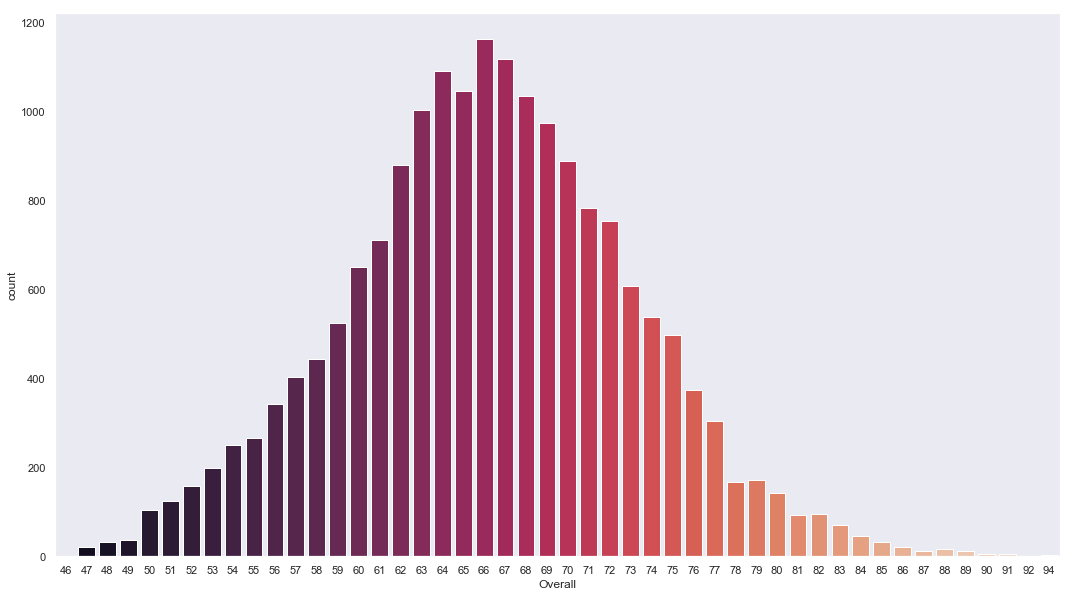

In [4]:
plt.figure(figsize=(18,10)) 
sns.countplot(fifa['Overall'], palette='rocket')
plt.show()

Looks like we have quite a normal distribution here. Kudos to the FIFA team on that.

Not surprised though, I expected something similar. Most players are average, some are just disappointingly wasted, and some extend all the way to extreme levels of awesomeness.

Moving on...

### The Eldest Players

In [5]:
fifa.sort_values(by = 'Age' , ascending = False)[['Name','Club','Nationality','Overall', 'Age' ]].head(5)

,Name,Club,Nationality,Overall,Age
4741,O. Pérez,Pachuca,Mexico,71,45
18183,K. Pilkington,Cambridge United,England,48,44
17726,T. Warner,Accrington Stanley,Trinidad & Tobago,53,44
10545,S. Narazaki,Nagoya Grampus,Japan,65,42
7225,C. Muñoz,CD Universidad de Concepción,Argentina,68,41


Not going to lie, I've **never** heard of these players. But a look at their overall might explain it!


### The Youngest Players 

In [6]:
fifa.sort_values(by = 'Age' , ascending = True)[['Name','Club','Nationality','Overall', 'Age','Potential' ]].head(5)

,Name,Club,Nationality,Overall,Age,Potential
18206,G. Nugent,Tranmere Rovers,England,46,16,66
17743,J. Olstad,Sarpsborg 08 FF,Norway,52,16,69
13293,H. Massengo,AS Monaco,France,62,16,75
16081,J. Italiano,Perth Glory,Australia,58,16,79
18166,N. Ayéva,Örebro SK,Sweden,48,16,72


Again, who are they even? 

Sure does look like my boy, Massengo has a bright future. 

### The Best Freekick Takers

In [7]:
fifa.sort_values(by = 'FKAccuracy' , ascending = False)[['Name','Club','Nationality','Overall', 'Age','FKAccuracy']].head(5)

,Name,Club,Nationality,Overall,Age,FKAccuracy
0,L. Messi,FC Barcelona,Argentina,94,31,94.0
293,S. Giovinco,Toronto FC,Italy,82,31,93.0
72,M. Pjanić,Juventus,Bosnia Herzegovina,86,28,92.0
1113,E. Bardhi,Levante UD,FYR Macedonia,77,22,91.0
449,H. Çalhanoğlu,Milan,Turkey,80,24,90.0


Okay, this is clearly no surprise. Messi at the top makes sense. 

But Ronaldo not in the top 5? What's up EA? 

### The Best Penalty Kick Taker

In [8]:
fifa.sort_values(by = 'Penalties' , ascending = False)[['Name','Club','Nationality','Overall', 'Age','Penalties']].head(5)

,Name,Club,Nationality,Overall,Age,Penalties
206,M. Balotelli,OGC Nice,Italy,83,27,92.0
118,Fabinho,Liverpool,Brazil,84,24,91.0
16,H. Kane,Tottenham Hotspur,England,89,24,90.0
297,M. Kruse,SV Werder Bremen,Germany,82,30,90.0
945,L. Baines,Everton,England,77,33,90.0


Wow, I thought Ronaldo would definitely make at least this list. Apparently not!

### The One with the Ball Control 

In [9]:
fifa.sort_values(by = 'BallControl' , ascending = False)[['Name','Club','Nationality','Overall', 'Age','BallControl']].head(5)

,Name,Club,Nationality,Overall,Age,BallControl
0,L. Messi,FC Barcelona,Argentina,94,31,96.0
2,Neymar Jr,Paris Saint-Germain,Brazil,92,26,95.0
30,Isco,Real Madrid,Spain,88,26,95.0
5,E. Hazard,Chelsea,Belgium,91,27,94.0
1,Cristiano Ronaldo,Juventus,Portugal,94,33,94.0


Ah, this gave us pretty standard values.

### The Fastest

Okay. pretty sure Mbappe and Sane should be near the top, but let's see where FIFA ranks them.

In [10]:
fifa.sort_values(by = 'SprintSpeed' , ascending = False)[['Name','Club','Nationality','Overall', 'Age','SprintSpeed']].head(5)

,Name,Club,Nationality,Overall,Age,SprintSpeed
1968,Adama,Wolverhampton Wanderers,Spain,75,22,96.0
55,L. Sané,Manchester City,Germany,86,22,96.0
25,K. Mbappé,Paris Saint-Germain,France,88,19,96.0
1489,I. Bebou,Hannover 96,Togo,76,24,95.0
36,G. Bale,Real Madrid,Wales,88,28,95.0


Finally getting a few predictions right, huh? 


## Famous Clubs


### Age Distribution

Let's start with the age distributuion in these clubs. My bet : Barcelona will top this list given the number of old players they have. 

In [11]:
clubs = ['Chelsea' , 'Arsenal', 'Juventus', 'Paris Sain-Germain' ,'FC Bayern München',
       'Real Madrid' , 'FC Barcelona' , 'Borussia Dortmund' , 'Manchester United' , 
       'FC Porto', 'Liverpool', 'Manchester City']

Questionable decision adding Liverpool, I know. 

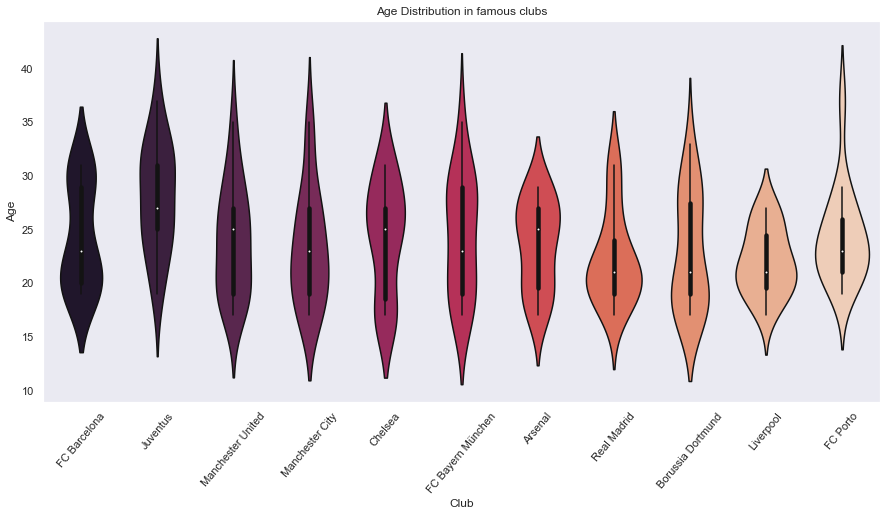

In [12]:
fifa_club_age = fifa.loc[fifa['Club'].isin(clubs) & fifa['Age']]
plt.figure(1 , figsize = (15 ,7))
sns.violinplot(x = 'Club' , y = 'Age' , data = fifa_club_age,palette='rocket')
plt.title('Age Distribution in famous clubs')
plt.xticks(rotation = 50)
plt.show()

Well, that's something. 

Looks like Real Madrid, Liverrpool and Porto have the most young talent. Good to know!

### Overall Rating

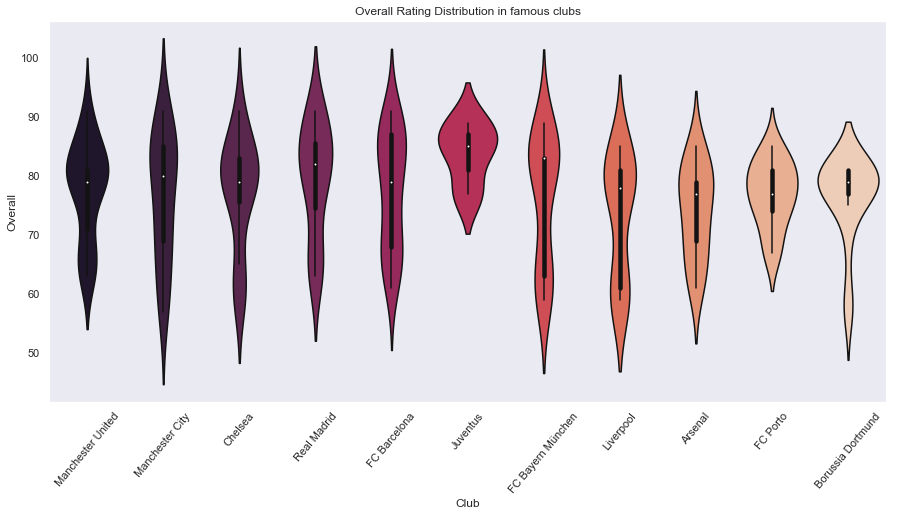

In [13]:
fifa_club_rating = fifa.loc[fifa['Club'].isin(clubs) & fifa['Overall']]
plt.figure(1 , figsize = (15 ,7))
sns.violinplot(x = 'Club' , y = 'Overall' , data = fifa_club_rating, palette='rocket')
plt.title('Overall Rating Distribution in famous clubs')
plt.xticks(rotation = 50)
plt.show()

Woah, look at Juventus go. Pretty sure they'll lead in Freekick Accuracy as well.

Really surprised by Barcelona and Real Madrid though. Ah, the things data can tell you :smile:

## The Best Club?

Real Madrid supporter here, so you know what I would want. 

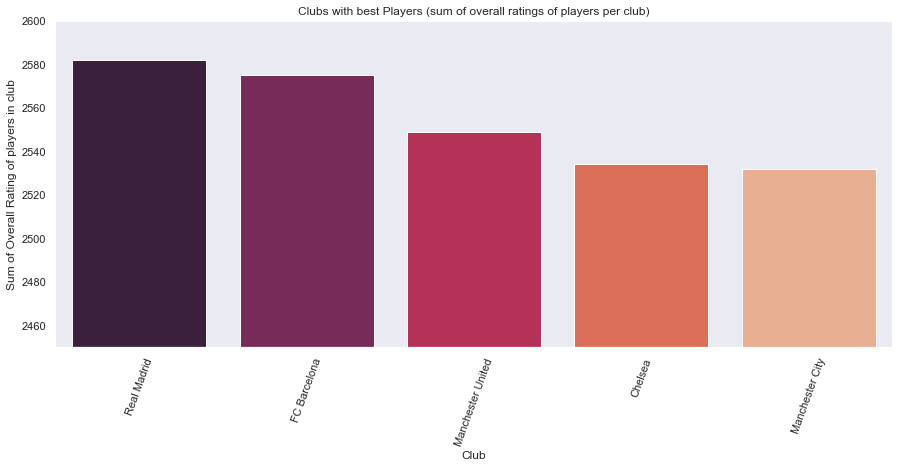

In [14]:
best_dict = {}
for club in fifa['Club'].unique():
    overall_rating = fifa['Overall'][fifa['Club'] == club].sum()
    best_dict[club] = overall_rating
best_club = pd.DataFrame.from_dict(best_dict,orient='index', columns = ['overall'])
best_club['club'] = best_club.index
best_club = best_club.sort_values(by = 'overall' , ascending =  False)

plt.figure(1 , figsize = (15 , 6))
sns.barplot(x = 'club' , y  = 'overall' , data = best_club.head(5),palette='rocket')  
plt.xticks(rotation = 70)
plt.xlabel("Club")
plt.ylabel('Sum of Overall Rating of players in club')
plt.title('Clubs with best Players (sum of overall ratings of players per club)')
plt.ylim(2450 , 2600)
plt.show()

Ha, at the top. 

Even Manchester United. Sweet, got 2 of my favorite clubs in the top 5.

## Popular Countries

### Age Distribution

In [15]:
countries = ['England' , 'Brazil' , 'Portugal' ,'Argentina',
             'Italy' , 'Spain' , 'Germany' ,'Netherlands','India']

India, you ask? Can't not. My country afer all!

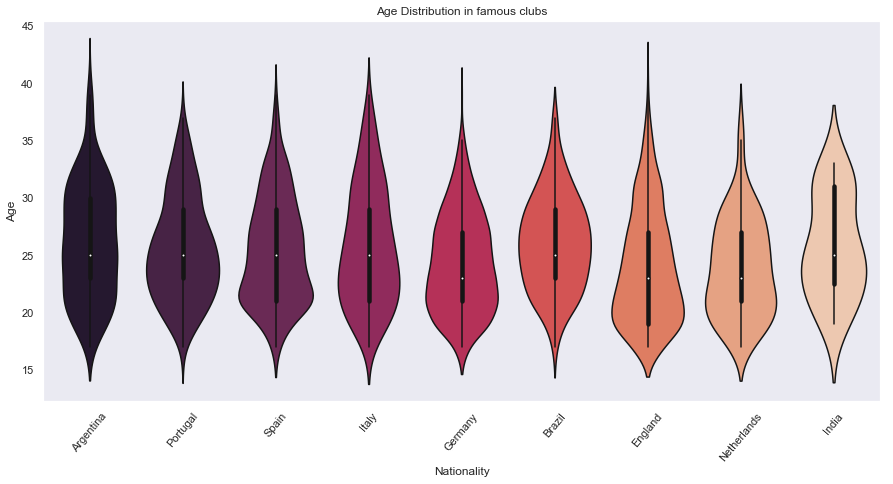

In [16]:
fifa_country_age = fifa.loc[fifa['Nationality'].isin(countries) & fifa['Age']]
plt.figure(1 , figsize = (15 ,7))
sns.violinplot(x = 'Nationality' , y = 'Age' , data = fifa_country_age, palette='rocket')
plt.title('Age Distribution in famous clubs')
plt.xticks(rotation = 50)
plt.show()

Looks like it might finally be good times for England maybe? 

But hey, Spain and Germany aren't too far behind either. 

Guess the Overall Rating can tell us more. 


### Overall Rating

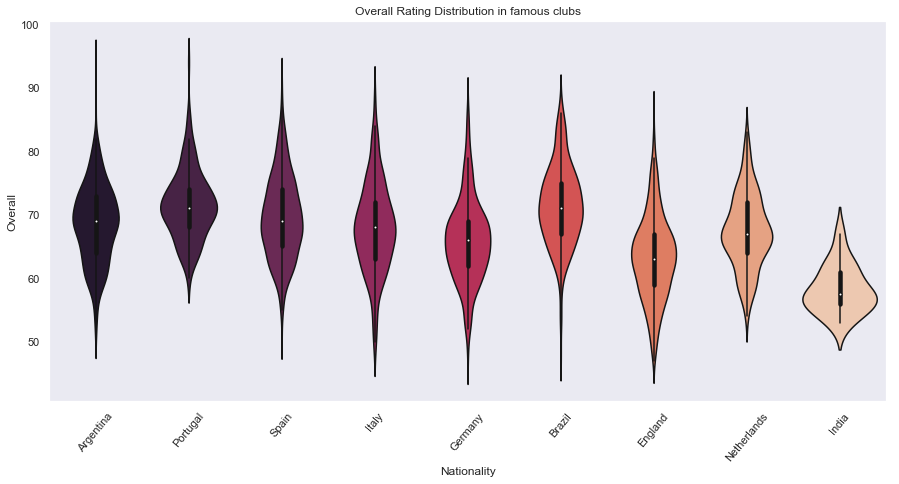

In [17]:
fifa_country_rating = fifa.loc[fifa['Nationality'].isin(countries) & fifa['Overall']]
plt.figure(1 , figsize = (15 ,7))
sns.violinplot(x = 'Nationality' , y = 'Overall' , data = fifa_country_age, palette='rocket')
plt.title('Overall Rating Distribution in famous clubs')
plt.xticks(rotation = 50)
plt.show()

Brazil really seems to be pretty dominant here. Must be the experienced players, as the previous plost have shown us. 

## The Best Country? 

Germany might be there at the top, along with Spain maybe? 

What do you think? 


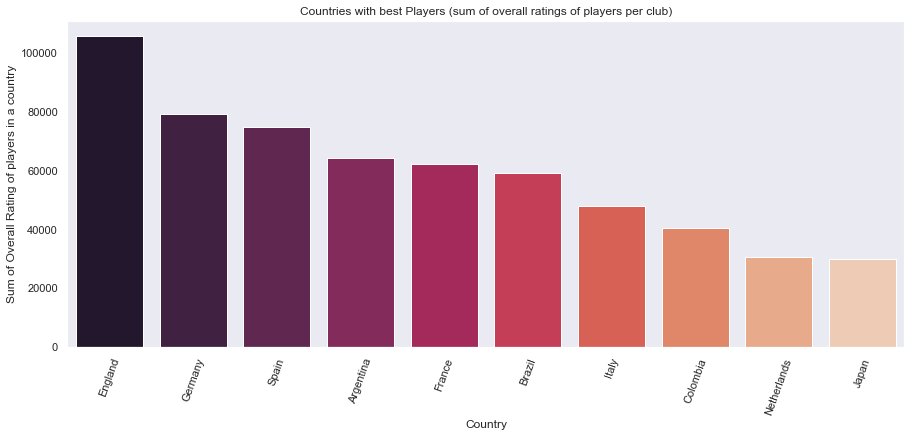

In [18]:
best_dict = {}
for country in fifa['Nationality'].unique():
    overall_rating = fifa['Overall'][fifa['Nationality'] == country].sum()
    best_dict[country] = overall_rating
best_country = pd.DataFrame.from_dict(best_dict,orient='index', columns = ['overall'])
best_country['club'] = best_country.index
best_country = best_country.sort_values(by = 'overall' , ascending =  False)

plt.figure(1 , figsize = (15 , 6))
sns.barplot(x = 'club' , y  = 'overall' , data = best_country.head(10),palette='rocket')  
plt.xticks(rotation = 70)
plt.xlabel("Country")
plt.ylabel('Sum of Overall Rating of players in a country')
plt.title('Countries with best Players (sum of overall ratings of players per club)')
#plt.ylim(2450 , 2600)
plt.show()

England, wow, that's just... well y'know. 

But let's put things into perspective. 

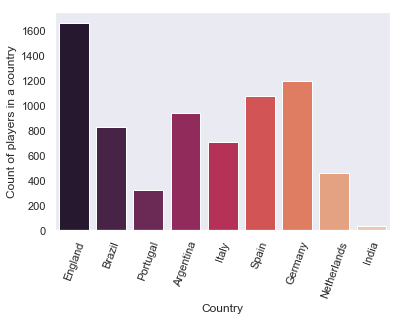

In [19]:
best_dict = {}

for country in countries:
    count = fifa['Overall'][fifa['Nationality'] == country].count()
    best_dict[country] = count
best_country = pd.DataFrame.from_dict(best_dict,orient='index', columns = ['count'])
best_country['club'] = best_country.index

sns.barplot(x = 'club' , y  = 'count' , data = best_country, palette='rocket')  
plt.xticks(rotation = 70)
plt.xlabel("Country")
plt.ylabel('Count of players in a country')
plt.show()

And this is where we realise that England just has a lot of players who're probably just average. 

But let's visualize that as well. 

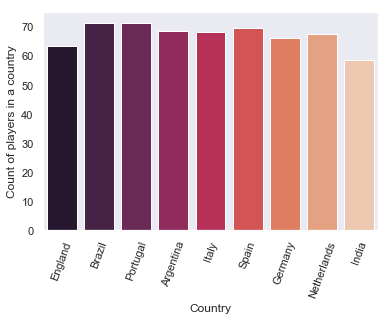

In [20]:
best_dict = {}

for country in countries:
    overall = fifa['Overall'][fifa['Nationality'] == country].sum() 
    count = fifa['Overall'][fifa['Nationality'] == country].count()
    country_overall = overall / count
    best_dict[country] = country_overall
best_country = pd.DataFrame.from_dict(best_dict,orient='index', columns = ['country_overall'])
best_country['club'] = best_country.index

sns.barplot(x = 'club' , y  = 'country_overall' , data = best_country, palette='rocket')  
plt.xticks(rotation = 70)
plt.xlabel("Country")
plt.ylabel('Count of players in a country')
plt.show()

Hey, look. India is pretty close to England now huh? 

**Now before you get triggered**, for those of you that don't understand this, take a better look at the dataset.
It contains a list of **all the players who are from England, not just those who play for the National Team.**

Hence this is an accurate reprsentation of all the players from England, not their national team as such. 

If you did want to visualise their national team, you'll need to provide Player Names as well.  

## Positions of Players

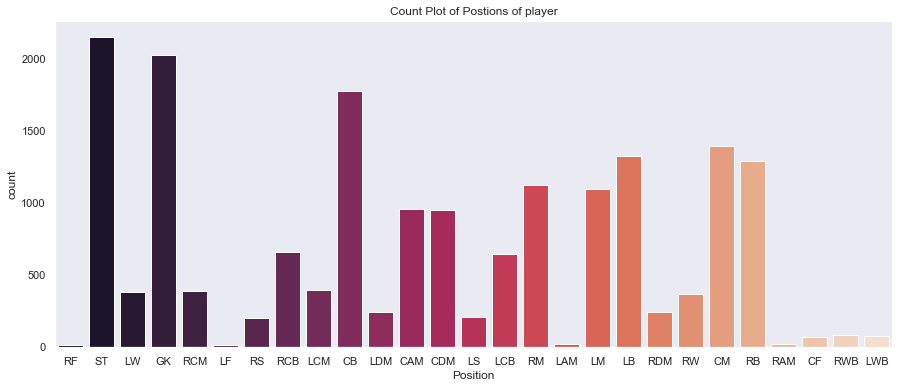

In [21]:
plt.figure(1 , figsize = (15 , 6))
sns.countplot(x = 'Position' , data = fifa , palette = 'rocket' )
plt.title('Count Plot of Postions of player')
plt.show()

Pretty much what is expected. 

But let's look at the features that are most common to each position. 

In [22]:
# Let's define the various player features
player_features = ['Crossing', 'Finishing', 'HeadingAccuracy',
       'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy',
       'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed',
       'Agility', 'Reactions', 'Balance', 'ShotPower', 'Jumping',
       'Stamina', 'Strength', 'LongShots', 'Aggression', 'Interceptions',
       'Positioning', 'Vision', 'Penalties', 'Composure', 'Marking',
       'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes']

for i, val in fifa.groupby(fifa['Position'])[player_features].mean().iterrows():
    print('Position {}: {}, {}, {}, {}, {}'.format(i, *tuple(val.nlargest(5).index)))

Position CAM: Balance, Agility, Acceleration, SprintSpeed, BallControl
Position CB: Strength, Jumping, StandingTackle, Aggression, HeadingAccuracy
Position CDM: Stamina, Aggression, Strength, ShortPassing, Jumping
Position CF: Agility, Balance, Acceleration, SprintSpeed, Dribbling
Position CM: Balance, ShortPassing, Agility, Stamina, Acceleration
Position GK: GKReflexes, GKDiving, GKPositioning, GKHandling, GKKicking
Position LAM: Agility, Balance, SprintSpeed, Acceleration, Dribbling
Position LB: SprintSpeed, Acceleration, Stamina, Balance, Agility
Position LCB: Strength, Jumping, StandingTackle, Aggression, HeadingAccuracy
Position LCM: Stamina, ShortPassing, Balance, Agility, BallControl
Position LDM: Stamina, ShortPassing, Strength, Aggression, BallControl
Position LF: Balance, Agility, Acceleration, Dribbling, BallControl
Position LM: Acceleration, SprintSpeed, Agility, Balance, Dribbling
Position LS: SprintSpeed, Strength, Acceleration, ShotPower, Positioning
Position LW: Acceler

# The Top 10 Players

Ah, the thing you've all been waiting for. 

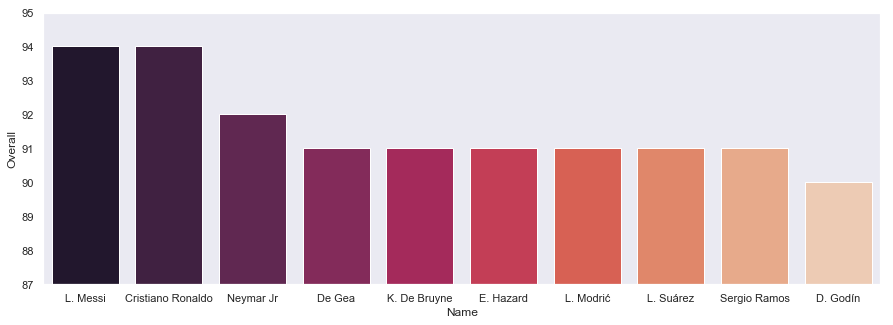

In [23]:
fifa_best_players = pd.DataFrame.copy(fifa.sort_values(by = 'Overall' , ascending = False ).head(10))

plt.figure(1 , figsize = (15 , 5))
sns.barplot(x ='Name' , y = 'Overall' , data = fifa_best_players,palette='rocket')

plt.ylim(87 , 95)
plt.show()

No surprises there (from FIFA's standpoint at least). 

## And lastly, The Highest Earner

If you take a look at the dataset you see that the wage column has various represnetations of the currency., i.e M and K. 

One way to deal with this is to convert everything to one base metric. 

In [24]:
def normalizing_wage(x):
    if '€' in str(x) and 'M' in str(x):
        c = str(x).replace('€' , '')
        c = str(c).replace('M' , '')
        c = float(c) * 1000000
        
    else:
        c = str(x).replace('€' , '')
        c = str(c).replace('K' , '')
        c = float(c) * 1000
            
    return c

fifa['Normalized_Wage'] = fifa['Wage'].apply(lambda x : normalizing_wage(x))

In [25]:
fifa.sort_values(by = 'Normalized_Wage' , ascending = False)[['Name','Club','Nationality',
                                                              'Overall', 'Age','Normalized_Wage','Wage']].head(5)

,Name,Club,Nationality,Overall,Age,Normalized_Wage,Wage
0,L. Messi,FC Barcelona,Argentina,94,31,565000.0,€565K
7,L. Suárez,FC Barcelona,Uruguay,91,31,455000.0,€455K
6,L. Modrić,Real Madrid,Croatia,91,32,420000.0,€420K
1,Cristiano Ronaldo,Juventus,Portugal,94,33,405000.0,€405K
8,Sergio Ramos,Real Madrid,Spain,91,32,380000.0,€380K
